In [1]:
from denn.utils import Discriminator, Generator
from denn.sho.gan_sho import train_GAN_SHO_semisupervised
import torch.nn as nn

# Semisupervised GAN

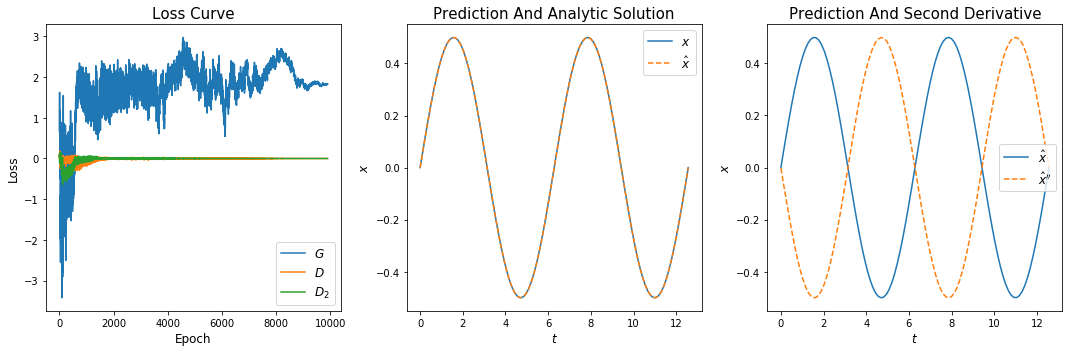

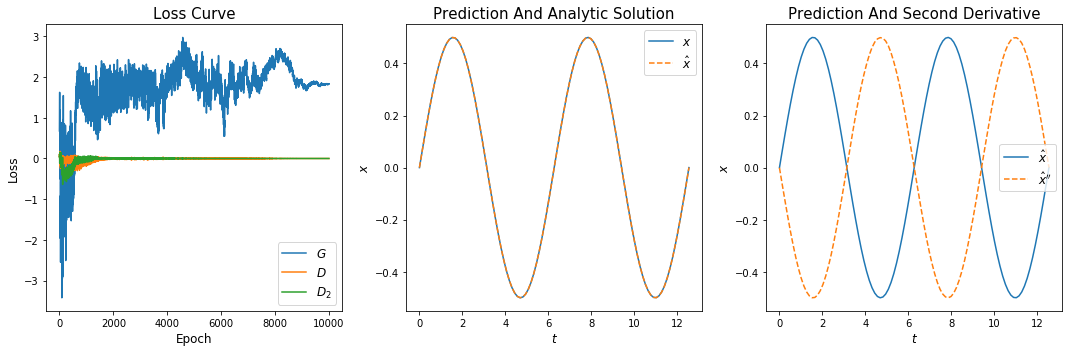

Final MSE: 9.142897994252053e-09


In [2]:
G = Generator(in_dim=1, out_dim=1,
              n_hidden_units=64,
              n_hidden_layers=6,
              activation=nn.Tanh(), 
              output_tan=False,
              residual=True)

D = Discriminator(in_dim=2, out_dim=1,
                  n_hidden_units=64,
                  n_hidden_layers=4,
                  activation=nn.Tanh(),
                  unbounded=True,
                  residual=True)

D2 = Discriminator(in_dim=2, out_dim=1,
                  n_hidden_units=64,
                  n_hidden_layers=4,
                  activation=nn.Tanh(),
                  unbounded=True,
                  residual=True)

res = train_GAN_SHO_semisupervised(G, D, D2, d_lr=1e-3, g_lr=2e-4, final_plot=True, num_epochs=10000, 
                                 realtime_plot=True, G_iters=1, D_iters=1, gp=0.1, check_every=100, system_of_ODE=False)

### Observers Every 20

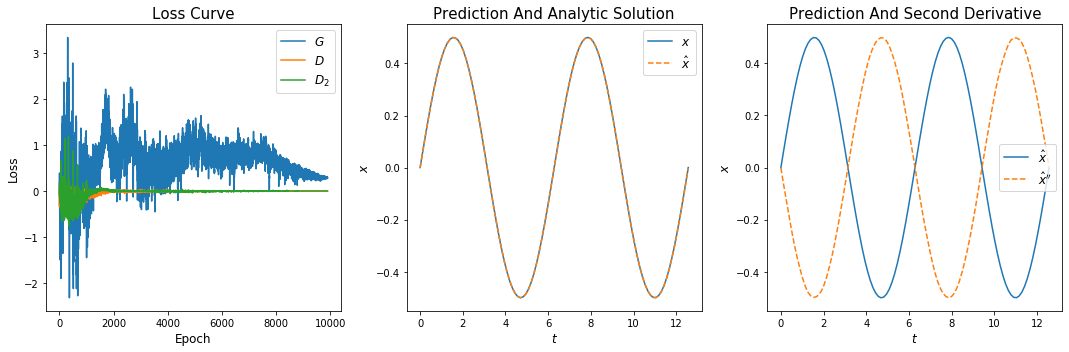

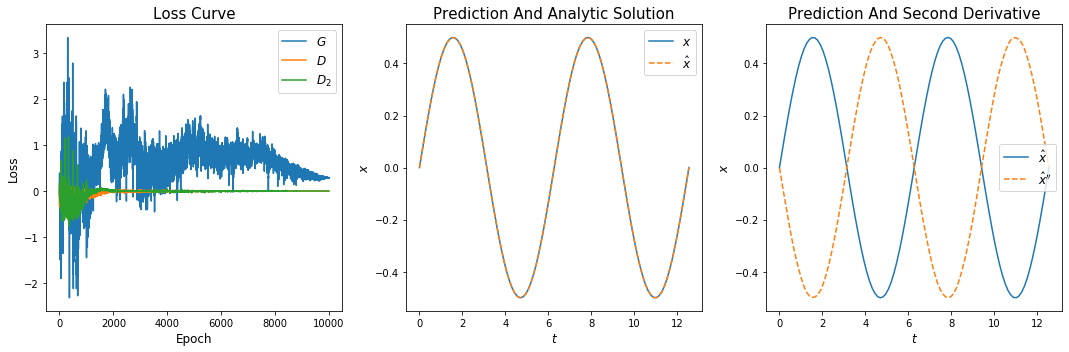

Final MSE: 1.470916188850424e-08


In [5]:
G = Generator(in_dim=1, out_dim=1,
              n_hidden_units=64,
              n_hidden_layers=6,
              activation=nn.Tanh(), 
              output_tan=False,
              residual=True)

D = Discriminator(in_dim=2, out_dim=1,
                  n_hidden_units=64,
                  n_hidden_layers=4,
                  activation=nn.Tanh(),
                  unbounded=True,
                  residual=True)

D2 = Discriminator(in_dim=2, out_dim=1,
                  n_hidden_units=64,
                  n_hidden_layers=4,
                  activation=nn.Tanh(),
                  unbounded=True,
                  residual=True)

res = train_GAN_SHO_semisupervised(G, D, D2, d_lr=1e-3, g_lr=2e-4, final_plot=True, num_epochs=10000, 
                                 realtime_plot=True, G_iters=1, D_iters=1, gp=0.1, check_every=100, system_of_ODE=False,
                                  observe_every=20)

# Semisupervised GAN (1 D, 1 MSE)

**This is on the master branch currently**

TODO: integrate this method back in?

# Semisupervised MSE

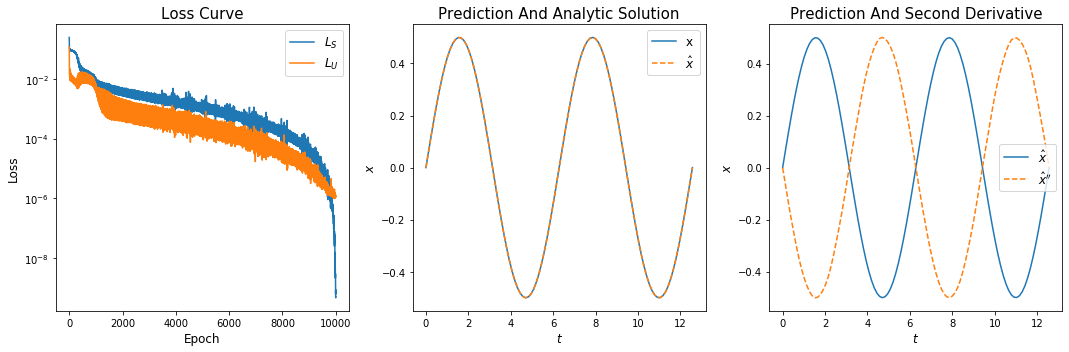

Final MSE 4.771078532250783e-10


In [3]:
from denn.utils import Discriminator, Generator
from denn.sho.mse_sho import train_MSE
import torch.nn as nn

msenet = Generator(in_dim=1, out_dim=1,
              n_hidden_units=64,
              n_hidden_layers=6,
              activation=nn.Tanh(), 
              output_tan=False,
              residual=True)

res = train_MSE(msenet, method='semisupervised', niters=10000, make_plot=True, perturb=True, lr=2e-4)

### Observers every 20

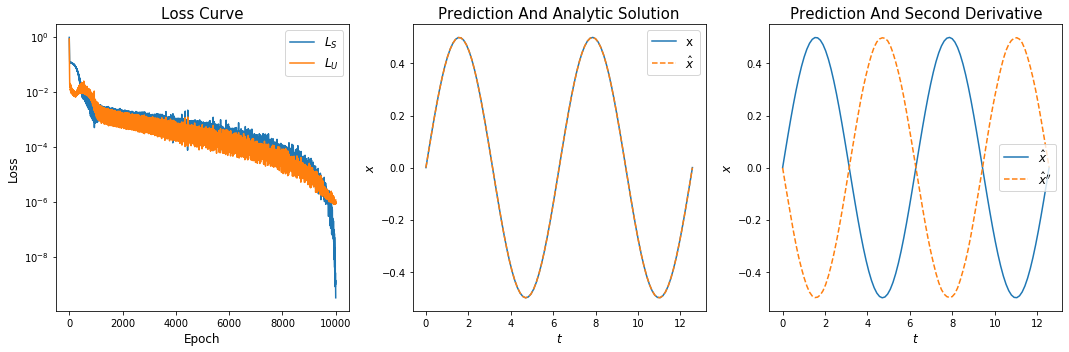

Final MSE 2.4450732549752274e-09


In [4]:
msenet = Generator(in_dim=1, out_dim=1,
              n_hidden_units=64,
              n_hidden_layers=6,
              activation=nn.Tanh(), 
              output_tan=False,
              residual=True)

res = train_MSE(msenet, method='semisupervised', niters=10000, make_plot=True, perturb=True, lr=2e-4, observe_every=20)

# Plot result from run_semi

In [52]:
L2_unsup = 1.4107371271165903e-07
gan_unsup = 3.5000178311150876e-09

In [39]:
import pandas as pd

In [66]:
sup = pd.read_csv('../../sup_semi_5k_d1_10neg3.csv', index_col=0)
l2 = pd.read_csv('../../l2_semi_5k_d1_10neg3.csv', index_col=0)
gan = pd.read_csv('../../gan_semi_5k_d1_s10neg3.csv', index_col=0)

In [67]:
import matplotlib.pyplot as plt

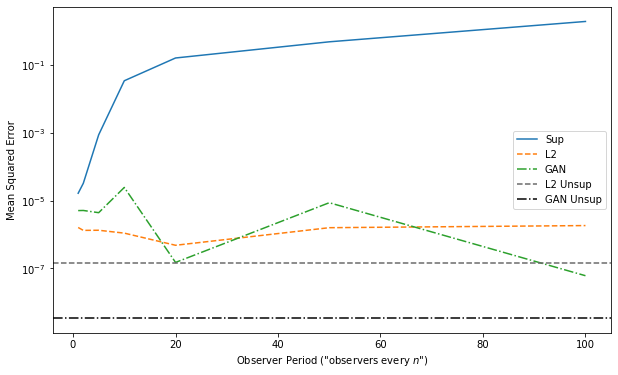

In [73]:
plt.figure(figsize=(10, 6))
plt.plot(sup.obs_freq, sup.mse, label='Sup')
plt.plot(l2.obs_freq, l2.mse, '--', label='L2')
plt.plot(gan.obs_freq, gan.mse, '-.', label='GAN')
plt.axhline(L2_unsup, ls='--', color='dimgray', label='L2 Unsup')
plt.axhline(gan_unsup, ls='-.', color='k', label='GAN Unsup')
plt.yscale('log')
plt.ylabel('Mean Squared Error')
plt.xlabel('Observer Period ("observers every $n$")')
plt.legend();